# K Nearest Neighbors

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

df_red = pd.read_csv('/kaggle/input/wine-quality/winequality-red.csv', delimiter=';')
df_red['hue']=1
df_white = pd.read_csv('/kaggle/input/wine-quality/winequality-white.csv', delimiter=';')
df_white['hue'] =0

df_wine = pd.concat([df_red, df_white], ignore_index=True)
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,hue
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [2]:
X = df_wine.drop(['hue'], axis=1)
y = df_wine['hue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [3]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [5]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
y_pred = knn.predict(X_test)

print("Accuracy score: " +str(accuracy_score(y_test, y_pred)))
print("\nConfusion Matrix: \n" +str(confusion_matrix(y_test, y_pred)))
print("\nClassification Report: \n" +str(classification_report(y_test, y_pred)))

Accuracy score: 0.9897435897435898

Confusion Matrix: 
[[1579    9]
 [  13  544]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1588
           1       0.98      0.98      0.98       557

    accuracy                           0.99      2145
   macro avg       0.99      0.99      0.99      2145
weighted avg       0.99      0.99      0.99      2145



### Optimizing value of K

In [7]:
def pred(data, k):
    df = data.copy()
    X = df.drop(['hue'], axis = 1)
    y = df['hue']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    scaler = preprocessing.StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    knn = KNeighborsClassifier(n_neighbors = k)
    
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    
    return score
    

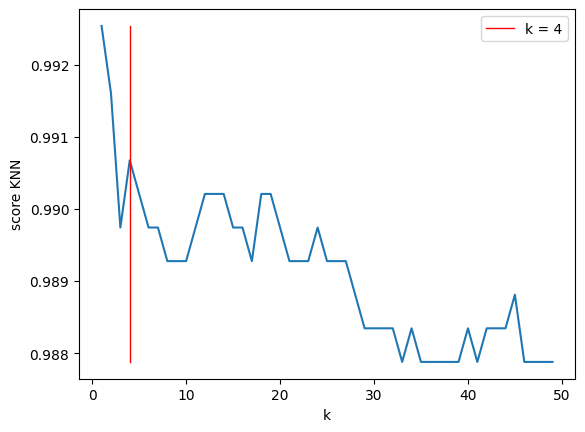

In [8]:
score = []
k = [i for i in range(1,50)]
for i in k:
    score.append(pred(df_wine, i))

k0 = 4
plt.plot(k,score)
plt.xlabel('k')
plt.ylabel('score KNN')
plt.plot([k0,k0],[min(score),max(score)],'r',lw = 1,label = f'k = {k0}')
plt.legend()
plt.show()

(Assuming that although k=1 has the highest performance, high chance of overfitting)

In [9]:
knn = KNeighborsClassifier(n_neighbors = 4)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy score: " + str(accuracy_score(y_test, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(y_test, y_pred)))
print("\nClassification report: \n" + str(classification_report(y_test, y_pred)))

Accuracy score: 0.9906759906759907

Confusion matrix: 
[[1582    6]
 [  14  543]]

Classification report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1588
           1       0.99      0.97      0.98       557

    accuracy                           0.99      2145
   macro avg       0.99      0.99      0.99      2145
weighted avg       0.99      0.99      0.99      2145

